<a href="https://colab.research.google.com/github/mohd-faizy/03P_01_Facial_Expression_Recoginition/blob/master/01_Facial_Expression_Recoginition_with_Keres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><h1 align=center><font size = 10, color = 'red'>Facial Expression Recognition with Keras</h1></strong>

## __Downloding Dataset__

[__Project Folder__](https://www.dropbox.com/s/rzy7401554q57gg/Project.zip)

## __Mounting and unzipping the file in google colab__
- Zip the Project folder, which contain the Datasetr and Coustom Module `utils`

- Upload the zipped folder to your Google drive

- Mount the Google Drive

```
from google.colab import drive
drive.mount('/content/drive')
```
- Follow the link and paste the code to your Goggle Colab notebook

- __Unzip__ the file to `/content/sample_data` using the following code$\downarrow$

`!unzip -uq "/content/drive/My Drive/PATH_TO_ZIP" -d "/content/drive/My Drive/PATH_TO_OUTPUT"`


## <center>**Locating the working Directory**</center>

- Using the `chdir()` to change the working directory to avoide any errors.

- We use Python method `chdir()` changes the current working directory to the given path.

```
import os
os.chdir('/content/sample_data/Project')
```
> The __OS module__ in python provides functions for interacting with the operating system. OS, comes under Python's standard utility modules.

> _This module provides a portable way of using operating system dependent functionality._

# <center>__OR__</center>

- __First__ import sys in name-file.py

```
import sys
```
- __Second__ append the folder path in name-file.py

```
sys.path.insert(0, '/the/folder/path/name-package/')
```
- __Third__ Make a blank file called __ init __.py in your subdirectory (this tells Python it is a package)

 - name-file.py
 - name-package
    - `__ init __.py`
    - name-module.py

- __Fourth__ import the module inside the folder in name-file.py





In [ ]:
# Mounting the Drive to Google colab

from google.colab import drive
drive.mount('/content/drive')

In [2]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/7_Coursera_Projects_Network/3_Facial_Expression_Recognition_with_Keras/Project.zip" -d "/content/sample_data"

In [3]:
# Changing the working directory

import os
os.chdir('/content/sample_data/Project')

In [4]:
pip install livelossplot

# __Task 1: Import Libraries__

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF

print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.2.0


# __Task 2: Plot Sample Image__

- Using the coustom package `utils` to get the spread of the distribution of the images.
- in the code below `.fer` stands for facial expression recognisation.


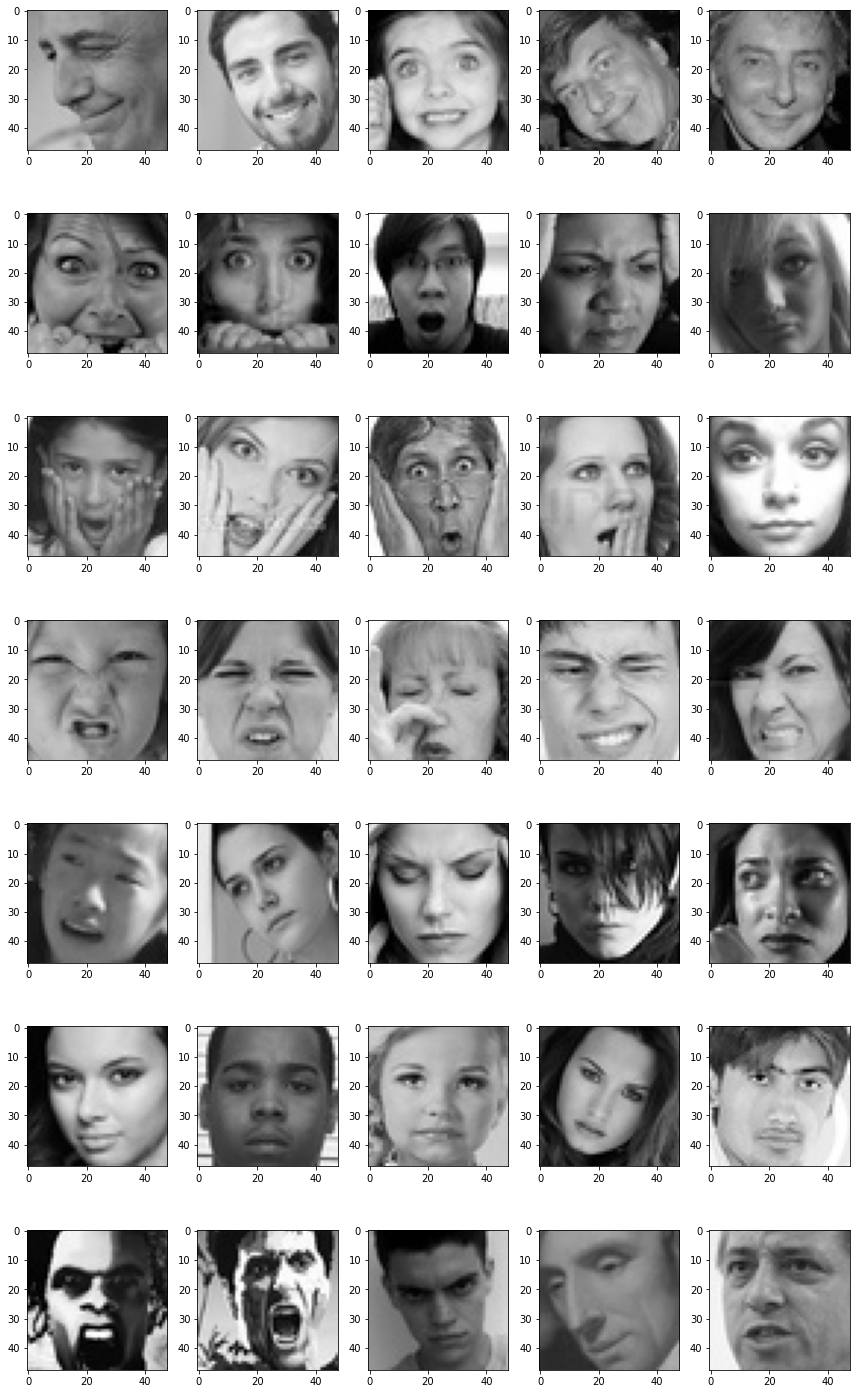

In [6]:
utils.datasets.fer.plot_example_images(plt).show()

- Checking the dataset for  __Class imbalance__ problem.
- if Classes have imbalance we can use the __Data augmentation__, To genrate more samples for __minority class__.

> __Defination:__ __Data Augmentation__ Techniques in CNN using __Tensorflow__.To overcome this problem of limited quantity and limited diversity of data, we generate(manufacture) our own data with the existing data which we have. This methodology of generating our own data is known as data augmentation


In [7]:
# Checking the class imbalance for the Training set

for expression in os.listdir('train/'):
    print(str(len(os.listdir('train/' + expression))) + ' ' + expression + ' images')


7215 happy images
4097 fear images
3171 surprise images
436 disgust images
4830 sad images
4965 neutral images
3995 angry images


__Output__ shows that we have class imbalance for __disgust images__ that are only 436 which is low as compoare to other images

# __Task 3: Generate Training and Validation Batches__

- we can set the height and widith parameter but since the Dataset images consist of `48 x 48` pixel images, So we can Set the Image size to 48.

- we hav choosen the Batch size to `64` to speed up the traning process, we can tune it latter to find out which value of the hyperParameter works the best.

- The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

 -  $\color{red}{\textbf{Batch Gradient Descent}}$: _Batch Size = Size of Training Set_
 -  $\color{red}{\textbf{Stochastic Gradient Descent}}$: _Batch Size = 1_
 - $\color{red}{\textbf{Mini-Batch Gradient Descent}}$: _1 < Batch Size < Size of Training Set_

- In the case of __mini-batch gradient descent__, popular batch sizes include 32, 64, and 128 samples
 


In [8]:
img_size = 48
batch_size = 64

# Performing the Keras Preprocessing
# Only one aspect Data Augmentation is Performed
# i.e ->> Randomly fliping the images along the Horizontal axis
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_genrator = datagen_train.flow_from_directory('train/',
                                                   target_size = (img_size, img_size),
                                                   color_mode = 'grayscale',
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)
# Target Image size is 48x48 consedering we don't have any anamoly in the data

datagen_validation = ImageDataGenerator(horizontal_flip = True)
validation_genrator = datagen_train.flow_from_directory('test/',
                                                  target_size = (img_size, img_size),
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


`class_mode='categorical'`
> The __Keras API__ provides a `categorical()' method that can be used to **one-hot encode** integer data.

- __One hot encoding__ is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset.

> A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

$\color{red}{\textbf{NOTE:}}$ ` shuffle=False` in `datagen_validation` i.e $\Rightarrow$ we don't have to shuffle the validation images

### __Task 4: Create CNN Model__

<img src = 'https://previews.dropbox.com/p/thumb/AA26pcquvLUi4Nj0Gu7ckcCqOTqWc66W-3lVi33EtNC8dTQ1vzZTxTqTU_RfuSTx44Mcmpxbzrv0kM-TY_uguT6S11ThDYshsR03x4E-8JZ0bkRwsTMVbuPBrazkdNiZm0QQ5xDzR6sf6GJT9VT1sOztrDDOSHxa2g1D0kugWtI3alqeqZRNL7Hg0dA-pUSmymoiG2RoXwCN83r_0aEnFdQxG9AUOJK9QkmIJdC5zZp_qmEyhaGdK2M5SlNstPm_LGhhj0RqmgrlIKYCP9EanhYl2IcGdZGxmn5C0LbvY02zqVMiNgI9C-gzknXLh7uLU0h239K5-feH-aC2cwdwBYTB1sUriNq4D6LVLBWn3ZHLkQ/p.png?fv_content=true&size_mode=5'>

Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

[__Keras Tutorials__](https://www.tutorialspoint.com/keras/index.htm)

In [9]:
model = Sequential()

# 1 - Conv layer
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1))) # input_shape = 48x48x1 [greyscale Image]
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25)) # Prevents the overfitting of Model

# 2 - Conv layer
model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25)) 

# 3 - Conv layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 4 - Conv layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten Layers
model.add(Flatten())

# 1 -Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 2 -Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Adding the last dense Output layer ->> SOFTMAX

model.add(Dense(7, activation = 'softmax')) # '7' as output has 7 classes

opt = Adam(lr = 0.0005)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# __Task 6: Train and Evaluate Model__

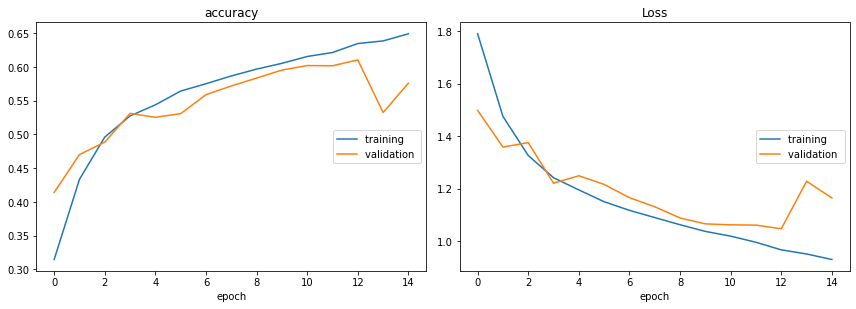

accuracy
	training         	 (min:    0.314, max:    0.649, cur:    0.649)
	validation       	 (min:    0.414, max:    0.610, cur:    0.576)
Loss
	training         	 (min:    0.931, max:    1.789, cur:    0.931)
	validation       	 (min:    1.048, max:    1.498, cur:    1.165)

Epoch 00015: saving model to model_weights.h5
448/448 [==============================] - 29s 64ms/step - loss: 0.9309 - accuracy: 0.6491 - val_loss: 1.1648 - val_accuracy: 0.5759 - lr: 5.0000e-04


In [10]:
# Setting the number of epoch
num_epochs = 15
num_steps_per_epoch = train_genrator.n//train_genrator.batch_size # Floor Division
num_validation_steps = validation_genrator.n//validation_genrator.batch_size

# Creating the checkpoints i.e Saving the weights with maximum Validation accuracy
checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor = 'val_accuracy',
                             save_weights_only = True,
                             mode = 'max',
                             verbose = 1)

# Defining another call back alert
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              min_lr = 0.00001,
                              model = 'auto')

# Callbacks
my_callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x = train_genrator,
    steps_per_epoch = num_steps_per_epoch,
    epochs = num_epochs,
    validation_data = validation_genrator,
    validation_steps = num_validation_steps,
    callbacks = my_callbacks
)

- [__What is the use of verbose in Keras while validating the model?__](https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model)

- [`ReduceLROnPlateau` __Keras Documentation__](https://)

- [__Callbacks API Keras Doc__](https://keras.io/api/callbacks/)

# __Task 7: Represent Model as JSON String__

In [11]:
# Converting the Model to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# __Flask App to Serve Prediction__

Locate `camera.py` in the Project directory

$\color{red}{\textbf{Make-the-changes-the code-as-follows}}$ Change the path in: `camera.py` code file so as lo locate the __facial_exp.mkv__ video file

```
self.video = cv2.VideoCapture("/content/sample_data/Project/videos/facial_exp.mkv")
```

__or__

Change the Path to zero without quote if you want to use your Own webcam to detect the facial expression


```
self.video = cv2.VideoCapture(0)
```
This set the source as adefault vedio input Source



# __`model.py` Code__


- Create a file as `model.py` with the following code $\Downarrow$
- & put that file in the Project main Directory



```
from tensorflow.keras.models import  model_from_json
import numpy as np
import tensorflow as tf


# Below The 3-lines can be removed for GPU enabled system

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.15
session = tf.compat.v1.Session(config=config)

class FacialExpressionModel(object):

    EMOTIONS_LIST = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

    def __init__(self, model_json_file, model_weights_file):
        with open(model_json_file, 'r') as json_file:
                  loaded_model_json = json_file.read()
                  self.loaded_model = model_from_json(loaded_model_json)

        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model._make_predict_function() #Removing Underscore in _make_predict_function()

    def pridict_emotions(self, img):
        self.preds = self.loaded_model.pridict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]
                
```



# __Designing the HTML Template for Flask App__

Save this file to the templates in the project directory as `index.html`

```
<!DOCTYPE html>
<html>
<head>
	<title>Facial Expression Recognition</title>
</head>
<body>
	<img id = "bg" width="800px" height="640px" src = "{{url_for('video_feed')}}">
</body>
</html>>
```



# __Running the Model__
locate 'main.py` and run it in the command line

In [ ]:
!python /content/sample_data/Project/main.py